# Face Swapper AI in Python

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import glob

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


## Preparing Face Analysis model 

In [2]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',download=False,download_zip=False)


C:\Users\bansa\AppData\Local\Programs\Python\Python312\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

## Reading the image using OpenCV


In [3]:
# Location of this jupyter notebook
notebook_location = os.getcwd()


#Location of the images i have stored locally
img1_path = notebook_location + "/images/ryan.jpg"
himymLocation = notebook_location + "/images/himym.jpg"
maxlocation = notebook_location + "/images/maxverstappen.jpg"


In [4]:
# Load the image using OpenCV
ryan = cv.imread(img1_path)
himym = cv.imread(himymLocation)
maxVerstappen = cv.imread(maxlocation)

In [5]:
# Convert the image from BGR to RGB
#OpenCV loads the image in BGR format, convert to RGB for matplotlib
ryan = cv.cvtColor(ryan, cv.COLOR_BGR2RGB)
himym = cv.cvtColor(himym, cv.COLOR_BGR2RGB)
maxVerstappen = cv.cvtColor(maxVerstappen, cv.COLOR_BGR2RGB)

## Displaying the images

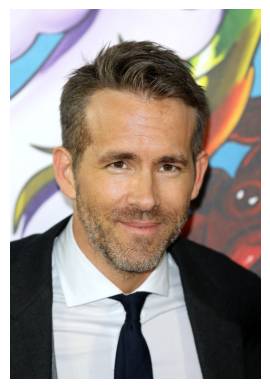

In [6]:
# Display the image using Matplotlib
plt.imshow(ryan)
plt.axis('off')  # Optional: to turn off the axis
plt.show()

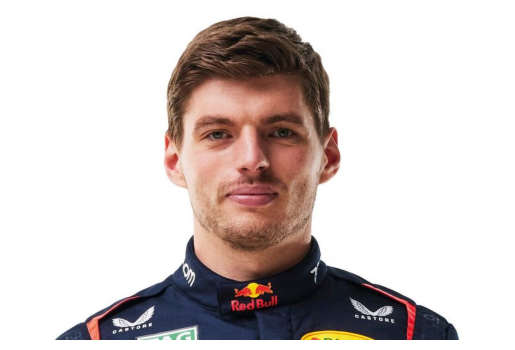

In [7]:
# Display the image using Matplotlib
plt.imshow(maxVerstappen)
plt.axis('off')  # Optional: to turn off the axis
plt.show()

This image of the friends cast is provided by the Insightface library

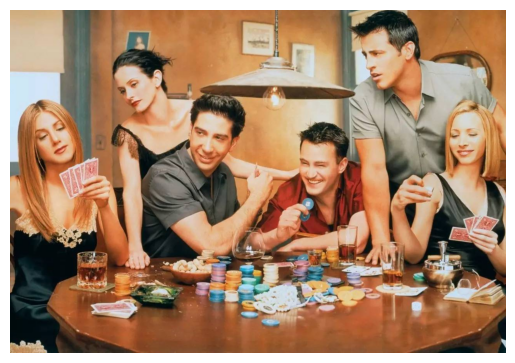

In [8]:
friends = ins_get_image('t1')
friends = cv.cvtColor(friends,cv.COLOR_BGR2RGB)
plt.imshow(friends)
plt.axis('off')
plt.show()

# Detecting the Faces

In [16]:
ryan_face = app.get(ryan)
friendsCast = app.get(friends)
max_face = app.get(maxVerstappen)

The faces have been recognised and are saved as a list containing:

1. Bounding Box (bbox)
2. Keypoints (kps)
3. Detection Score (det_score)
4. 3D Facial Landmarks (landmark_3d_68)
5. Pose (pose)
6. 2D Facial Landmarks (landmark_2d_106)
7. Gender (gender)
8. Age (age)
9. Embedding (embedding)
    
Now to display the faces recognised.

# Displaying the faces


## Showing individual faces 

The faces have been detected by the model and now are displayed as shown

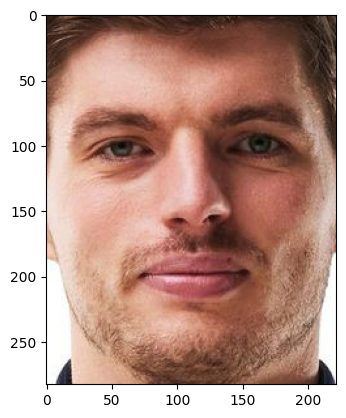

In [17]:
assert len(max_face) == 1
max_face = max_face[0]
bbox = max_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(maxVerstappen[bbox[1]:bbox[3],bbox[0]:bbox[2]])
plt.show()

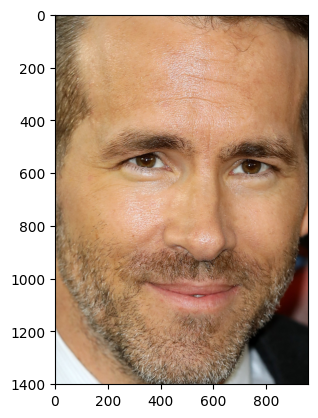

In [18]:
assert len(ryan_face) == 1
ryan_face = ryan_face[0]
bbox = ryan_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(ryan[bbox[1]:bbox[3],bbox[0]:bbox[2]])
plt.show()

# Displaying multiple faces detected from a single image
### Creating the boxes

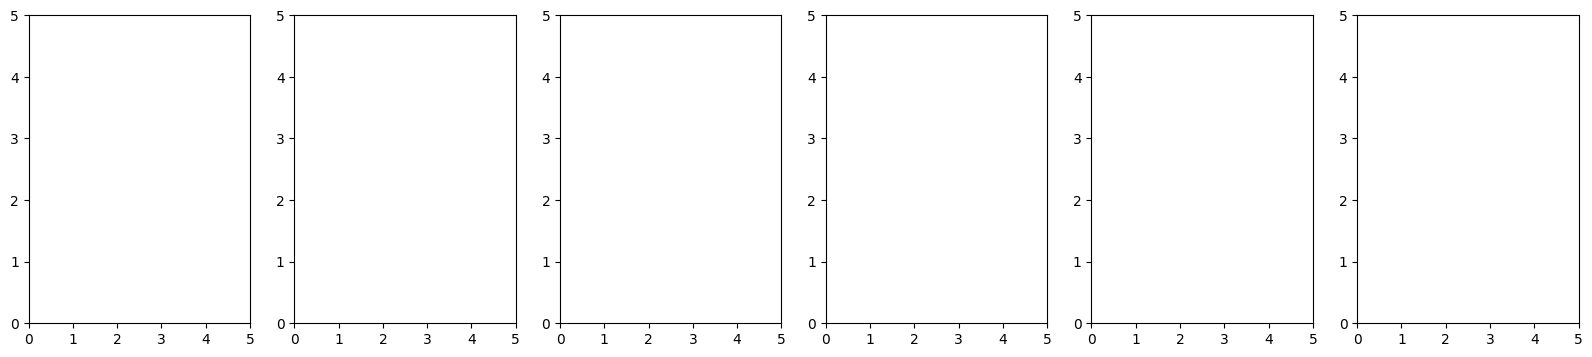

In [19]:
# Figure is the whole frame here
# axs are the number of boxes
#subplots(rows, coloumns, figsize=(width, height)
fig, axs = plt.subplots(1, 6, figsize=(20, 4))

# Loop through each subplot and turn off the axes
for ax in axs:
    ax.axis([0,5,0,5])

### Displaying individual faces into the boxes

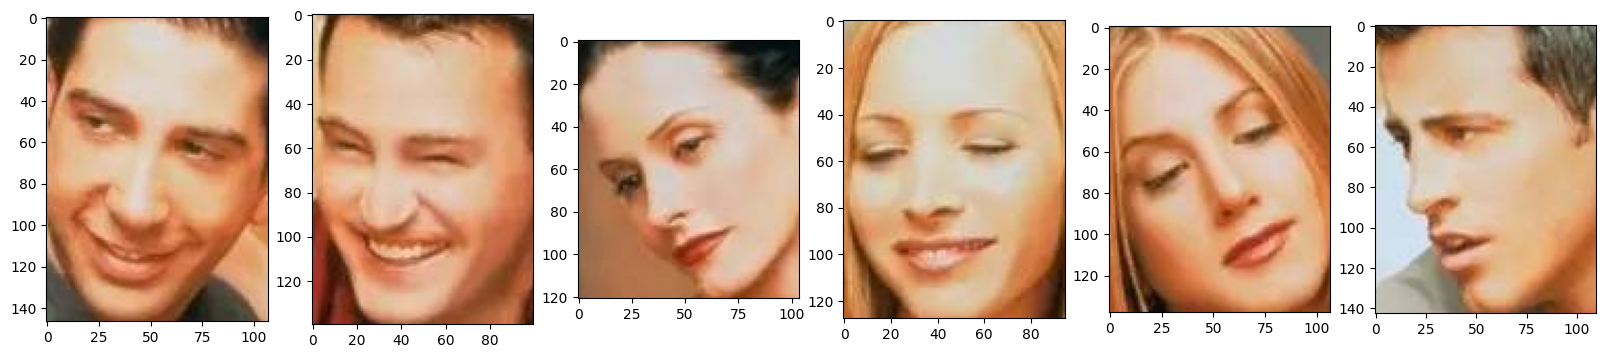

In [21]:
friends = ins_get_image('t1')
fig, axs = plt.subplots(1, 6, figsize=(20, 10))

for i, face in enumerate(friendsCast):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(friends[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('on')

### Displaying a single face from all 6


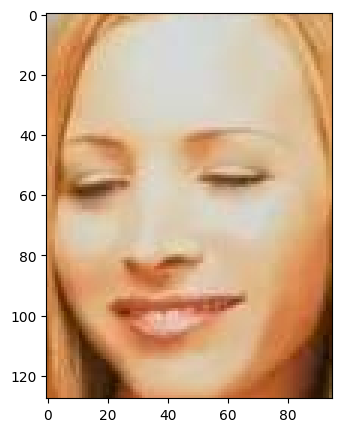

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))

# Access the 4th face (index 3)
face = friendsCast[3]
bbox = face['bbox']
bbox = [int(b) for b in bbox]

# Display the 4th face in a single plot
ax.imshow(friends[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
ax.axis('on')  # You can use 'off' to hide the axis if needed
plt.show()

# Swapping the Faces

In [26]:
# Sorts left to right
faces = sorted(friendsCast, key = lambda x : x.bbox[0])
res = friends.copy()
assert len(faces)==6 # Confirm 6 faces found
source_face = ryan_face

Displaying the source face

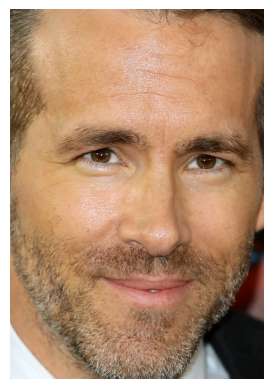

In [27]:
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]

plt.imshow(ryan[bbox[1]:bbox[3],bbox[0]:bbox[2]])
plt.axis('off')
plt.show()

Swapping the source face onto all the faces

In [39]:
# for swapping all faces
res = friends.copy()
for face in friendsCast:
   res = swapper.get(res, face, ryan_face, paste_back=True)

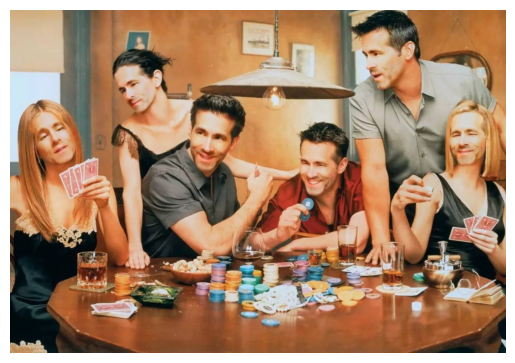

In [40]:
plt.imshow(res[:,:,::-1])
plt.axis('off')
plt.show()

Swapping the source face onto a single face

In [41]:
maxie = maxVerstappen.copy()
ryan_max = swapper.get(maxie, max_face, ryan_face) 
# Passing the image and the face to replace

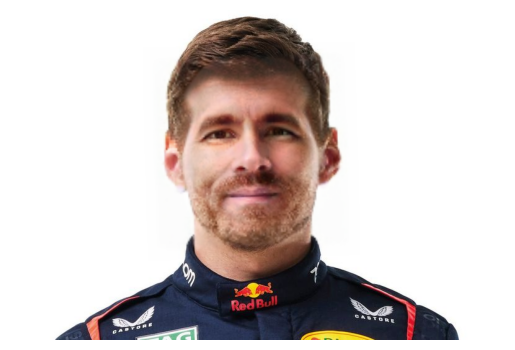

In [42]:
# Display the resulting image
plt.imshow(ryan_max)
plt.axis('off')
plt.show()

## Saving the swapped image

In [49]:
# saving the swapped image
output_path = 'swapped_multiple.jpg'
cv.imwrite(output_path, res)

output_path2 = 'swapped_image.jpg'
ryan_max = cv.cvtColor(ryan_max, cv.COLOR_BGR2RGB)
cv.imwrite(output_path2, ryan_max)

True

In [50]:
print(f"Output images saved to {output_path} and {output_path2}")

Output images saved to swapped_multiple.jpg and swapped_image.jpg
